In [1]:
from tests.yolo_v1 import  YOLO
from generators import BDIGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'tests.yolo_v1'

In [2]:
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.metrics import Mean, MeanIoU
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
yolo_net = YOLO(input_sh=(228, 228, 3), dp_rate=0.45)
yolo_net.compile(optimizer=Adam(), 
                    loss_fn=[
                        MeanSquaredError(), 
                        MeanSquaredError(), 
                        BinaryCrossentropy()
    ])
    
generator = BDIGenerator(input_sh=(228, 228, 3))
images = []
bb = []
bba = []
cll_labels = []
for (sample_n, sample) in enumerate(iter(generator)):

    if sample_n == 1000:
        break

    images.append(sample[0])
    bb.append(sample[1])
    bba.append(sample[2])
    cll_labels.append(sample[3])
    
images = np.asarray(images)
bb = np.asarray(bb)
bba = np.asarray(bba)
cll_labels = np.asarray(cll_labels)
    

images = images / 255.0
images = (images - np.mean(images)) / np.std(images)
bba = (bba - np.mean(bba)) / np.std(bba)

yolo_net.fit(images, (bb, bba, cll_labels),
           epochs=32, batch_size=32)
     
yolo_net.save_weights(filepath="C:\\Users\\1\\Desktop\\drone_solution\\yolo_weights.weights.h5")
#yolo_net.load_weights(filepath="C:\\Users\\1\\Desktop\\drone_solution\\yolo_weights.weights.h5")
pred_boxes, pred_logits = yolo_net.predict(images)

Epoch 1/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 367s 11s/step - bounding_box_loss: 49163.3789 - class_dist_loss: 12.0065
Epoch 2/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 364s 11s/step - bounding_box_loss: 17339.9727 - class_dist_loss: 14.7443
Epoch 3/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 364s 11s/step - bounding_box_loss: 7397.4468 - class_dist_loss: 14.2406
Epoch 4/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 394s 12s/step - bounding_box_loss: 3908.0886 - class_dist_loss: 6.1750
Epoch 5/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 379s 12s/step - bounding_box_loss: 1988.4333 - class_dist_loss: 1.8783
Epoch 6/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 384s 12s/step - bounding_box_loss: 1809.6353 - class_dist_loss: 0.2840
Epoch 7/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 377s 12s/step - bounding_box_loss: 1114.8269 - class_dist_loss: 0.0634
Epoch 8/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 356s 11s/step - bounding_box_loss: 949.7363 - class_dist_loss: 0.0662
Epoch 9/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 290s 9s/step - bounding_box_loss: 844.1317 - class_dist_loss: 0.0013
Epoch 10/32
32/32

KeyboardInterrupt: 

In [8]:
pred_boxes = pred_boxes.astype("int")
print(pred_boxes[56])

[311 396 195 105]


In [51]:
generator = BDIGenerator(input_sh=None)
images = []
bb = []
bba = []
cll_labels = []
for (sample_n, sample) in enumerate(iter(generator)):

    if sample_n == 1000:
        break

    images.append(sample[0])
    bb.append(sample[1])
    bba.append(sample[2])
    cll_labels.append(sample[3])
    
images = np.asarray(images)
bb = np.asarray(bb)
bba = np.asarray(bba)
cll_labels = np.asarray(cll_labels)

In [52]:
bb = bb.astype("int")

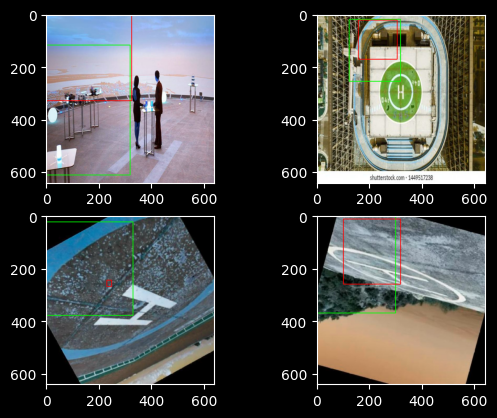

In [53]:
plt.style.use("dark_background")
fig, axis = plt.subplots(nrows=2, ncols=2)

for i in range(axis.shape[0]):
    for j in range(axis.shape[1]):

        
        random_idx = np.random.randint(0, images.shape[0])
        image_sample = images[random_idx]
        bb_centerd = [0, 0, 0, 0]
        bb_pred_centerd = [0, 0, 0, 0]

        bb_centerd[0] = bb[random_idx][0] - bb[random_idx][2] // 2
        bb_centerd[1] = bb[random_idx][1] - bb[random_idx][3] // 2
        bb_centerd[2] = bb[random_idx][0] + bb[random_idx][2] // 2
        bb_centerd[3] = bb[random_idx][1] + bb[random_idx][2] // 2

        bb_pred_centerd[0] = pred_boxes[random_idx][0] - pred_boxes[random_idx][2] // 2
        bb_pred_centerd[1] = pred_boxes[random_idx][1] - pred_boxes[random_idx][3] // 2
        bb_pred_centerd[2] = pred_boxes[random_idx][0] + pred_boxes[random_idx][2] // 2
        bb_pred_centerd[3] = pred_boxes[random_idx][1] + pred_boxes[random_idx][2] // 2


        image_sample = cv2.rectangle(image_sample, bb_centerd[:2], bb_centerd[2:], color=(0, 255, 0), thickness=2)
        image_sample = cv2.rectangle(image_sample, bb_pred_centerd[:2], bb_pred_centerd[2:], color=(255, 0, 0), thickness=2)
        
        axis[i, j].imshow(image_sample)

plt.show()
        

        
        

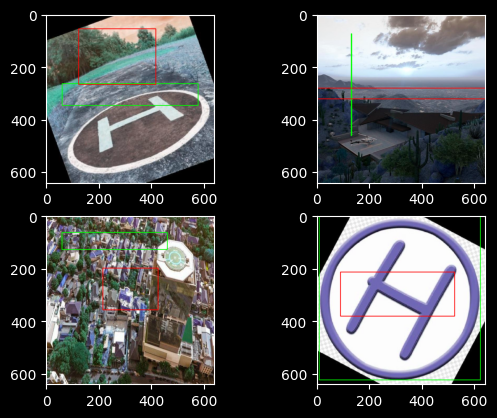

In [58]:
plt.style.use("dark_background")
fig, axis = plt.subplots(nrows=2, ncols=2)

for i in range(axis.shape[0]):
    for j in range(axis.shape[1]):

        
        random_idx = np.random.randint(0, images.shape[0])
        image_sample = images[random_idx]
        image_sample = cv2.rectangle(image_sample, bb[random_idx][:2], bb[random_idx][2:], color=(0, 255, 0), thickness=2)
        image_sample = cv2.rectangle(image_sample, pred_boxes[random_idx][:2], pred_boxes[random_idx][2:], color=(255, 0, 0), thickness=2)
        
        axis[i, j].imshow(image_sample)

plt.show()

In [166]:
random_idx = np.random.randint(0, images.shape[0])
image_sample = images[random_idx]
res_sample = cv2.resize(image_sample, (128, 128))
res_sample = np.expand_dims(res_sample, axis=0)

pred_box, pred_logit = yolo_net.predict(res_sample)
pred_box = pred_box[0].astype("int")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


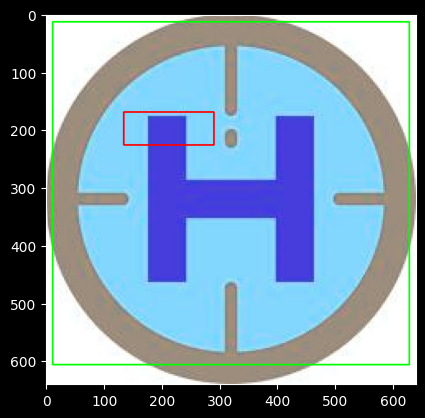

In [167]:
fig, axis = plt.subplots()
image_sample = cv2.rectangle(image_sample, bb[random_idx][:2], bb[random_idx][2:], color=(0, 255, 0), thickness=2)
image_sample = cv2.rectangle(image_sample, pred_box[:2], pred_box[2:], color=(255, 0, 0), thickness=2)
axis.imshow(image_sample)